In [45]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology, exposure, util

In [47]:
# Cargar una imagen de ejemplo (puedes cambiar 'camera' por 'coins', 'astronaut', 'coffee' o 'moon')
imagen = data.camera()

In [48]:
# Convertir a escala de grises si es necesario
if len(imagen.shape) == 3:
    imagen_gris = color.rgb2gray(imagen)
else:
    imagen_gris = imagen.copy()

In [49]:
# Definir filtros con sus explicaciones
filtros = {
    'Original': {
        'funcion': lambda img: img,
        'explicacion': 'Imagen original sin modificaciones.'
    },
    'Escala de grises': {
        'funcion': lambda img: color.rgb2gray(img) if len(img.shape) == 3 else img,
        'explicacion': 'Convierte la imagen a tonos de gris, eliminando la información de color.'
    },
    'Desenfoque Gaussiano': {
        'funcion': lambda img: filters.gaussian(imagen_gris, sigma=1.0),
        'explicacion': 'Aplica un suavizado que reduce el ruido y los detalles finos utilizando una distribución gaussiana.'
    },
    'Detección de bordes (Sobel)': {
        'funcion': lambda img: filters.sobel(imagen_gris),
        'explicacion': 'Detecta cambios de intensidad, resaltando los bordes de los objetos en la imagen.'
    },
    'Umbralización': {
        'funcion': lambda img: imagen_gris > 0.5,
        'explicacion': 'Convierte la imagen a blanco y negro basándose en un valor umbral fijo (0.5).'
    },
    'Umbralización Otsu': {
        'funcion': lambda img: imagen_gris > filters.threshold_otsu(imagen_gris),
        'explicacion': 'Determina automáticamente el mejor valor umbral para separar fondo y objetos.'
    },
    'Dilatación': {
        'funcion': lambda img: morphology.dilation(imagen_gris, morphology.disk(2)),
        'explicacion': 'Expande las regiones brillantes, útil para unir áreas divididas o eliminar pequeños agujeros.'
    },
    'Erosión': {
        'funcion': lambda img: morphology.erosion(imagen_gris, morphology.disk(2)),
        'explicacion': 'Reduce las regiones brillantes, útil para eliminar pequeños objetos o detalles no deseados.'
    },
    'Ecualización de Histograma': {
        'funcion': lambda img: exposure.equalize_hist(imagen_gris),
        'explicacion': 'Redistribuye los niveles de intensidad para mejorar el contraste global de la imagen.'
    },
    'Aumento de Contraste': {
        'funcion': lambda img: np.clip(imagen_gris * 1.5, 0, 1),
        'explicacion': 'Incrementa la diferencia entre áreas claras y oscuras, haciendo la imagen más nítida.'
    },
    'Ruido Sal y Pimienta': {
        'funcion': lambda img: util.random_noise(imagen_gris, mode='s&p', amount=0.05),
        'explicacion': 'Añade puntos blancos y negros aleatorios, simulando ruido en sensores o transmisión.'
    }
}

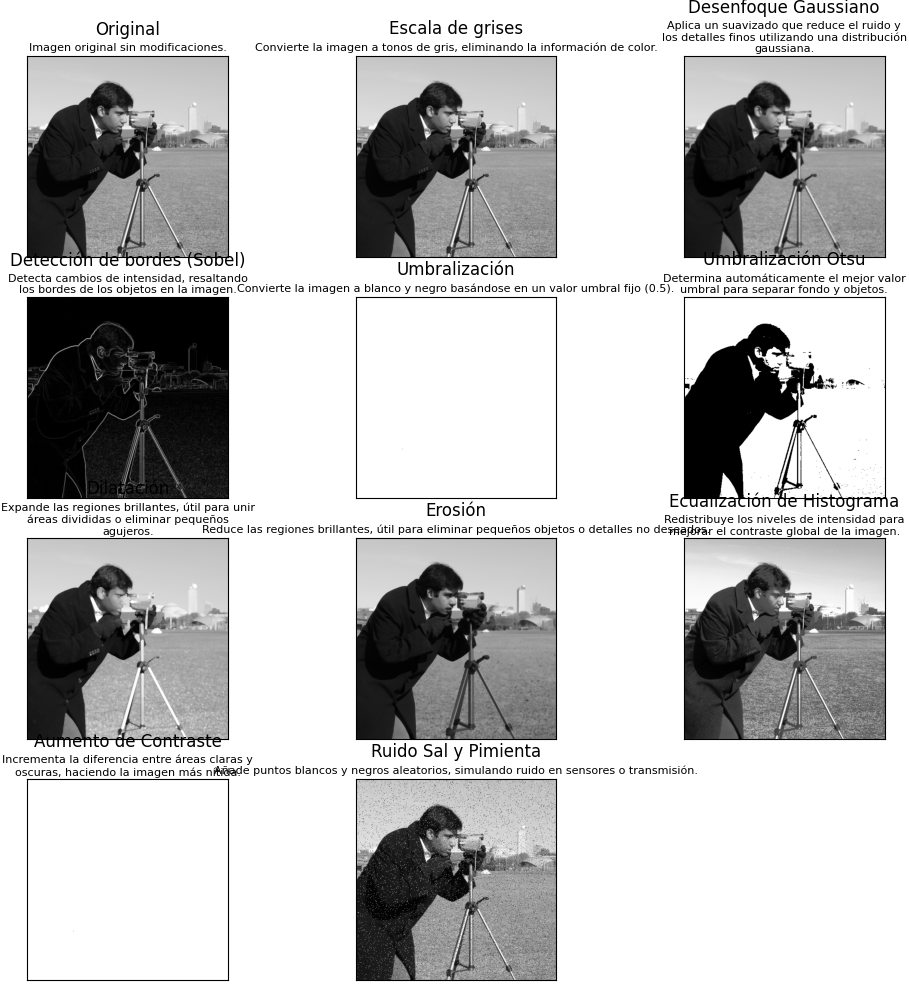

In [53]:
# Configurar la visualización
fig = plt.figure(figsize=(12, 12))
filas = 4
columnas = 3

# Aplicar y mostrar cada filtro
for i, (nombre, info) in enumerate(filtros.items()):
    # Crear subgráfico
    ax = plt.subplot(filas, columnas, i+1)

    # Aplicar filtro
    img_filtrada = info['funcion'](imagen)

    # Mostrar imagen
    if len(img_filtrada.shape) == 3:
        ax.imshow(img_filtrada)
    else:
        ax.imshow(img_filtrada, cmap='gray')

    # Añadir título y explicación
    ax.set_title(nombre)
    ax.set_xlabel(info['explicacion'], fontsize=8, wrap=True)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

In [52]:
# Ajustar diseño y mostrar
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Demostración de Filtros de Visión por Computador", fontsize=16, y=0.98)
plt.show()

<Figure size 640x480 with 0 Axes>

Reconocimiento **facial**



In [55]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install scipy

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, feature, filters, exposure, segmentation, morphology
from skimage.feature import hog
from scipy import ndimage

In [56]:
# Cargar imagen de rostro de ejemplo
imagen = data.astronaut()  # Imagen de astronauta que incluye un rostro
# Recortar para enfocar más en el rostro
imagen = imagen[50:280, 170:350]

In [57]:
# Convertir a escala de grises para procesamiento facial
imagen_gris = color.rgb2gray(imagen)


In [65]:
# Definir filtros con explicaciones específicas para análisis facial
filtros = {
    'Original': {
        'funcion': lambda img: img,
        'explicacion': 'Imagen original del rostro sin procesar.'
    },
    'Escala de grises': {
        'funcion': lambda img: color.rgb2gray(img) if len(img.shape) == 3 else img,
        'explicacion': 'Conversión a escala de grises, paso inicial en muchos algoritmos de reconocimiento facial.'
    },
    'Ecualización de Histograma': {
        'funcion': lambda img: exposure.equalize_hist(imagen_gris),
        'explicacion': 'Mejora el contraste, ayudando a resaltar características faciales independientemente de la iluminación.'
    },
    'CLAHE': {
        'funcion': lambda img: exposure.equalize_adapthist(imagen_gris),
        'explicacion': 'Ecualización adaptativa de histograma con contraste limitado, mejora detalles locales del rostro.'
    },
    'Detección de Bordes': {
        'funcion': lambda img: filters.sobel(imagen_gris),
        'explicacion': 'Resalta los bordes del rostro y características como ojos, nariz y boca.'
    },
    'Detección de Bordes (Canny)': {
        'funcion': lambda img: feature.canny(imagen_gris, sigma=1.0),
        'explicacion': 'Detector avanzado de bordes, útil para encontrar contornos precisos de características faciales.'
    },
    'Suavizado Gaussiano': {
        'funcion': lambda img: filters.gaussian(imagen_gris, sigma=1.0),
        'explicacion': 'Reduce ruido manteniendo características faciales importantes, usado en preprocesamiento.'
    },
    'HOG (Histograma de Gradientes)': {
        'funcion': lambda img: hog(imagen_gris, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, feature_vector=False)[1],
        'explicacion': 'Extrae características de dirección de bordes, técnica fundamental en reconocimiento facial.'
    },
    'Segmentación': {
        'funcion': lambda img: segmentation.felzenszwalb(imagen_gris, scale=100, sigma=0.5, min_size=50),
        'explicacion': 'Segmenta la imagen en regiones, ayudando a separar el rostro del fondo.'
    },
    'Umbralización Otsu': {
        'funcion': lambda img: imagen_gris > filters.threshold_otsu(imagen_gris),
        'explicacion': 'Separa el rostro del fondo usando umbralización automática.'
    },
    'Filtro de Máximos Locales': {
        'funcion': lambda img: feature.peak_local_max(imagen_gris, min_distance=10, threshold_abs=0.1), # Remove the 'indices' argument
        'explicacion': 'Detecta puntos de interés que pueden corresponder a características faciales clave.'
    },
    'Relieve': {
        'funcion': lambda img: ndimage.gaussian_filter(imagen_gris, 2) - ndimage.gaussian_filter(imagen_gris, 1),
        'explicacion': 'Resalta la estructura tridimensional del rostro, útil para detectar profundidad.'
    }
}

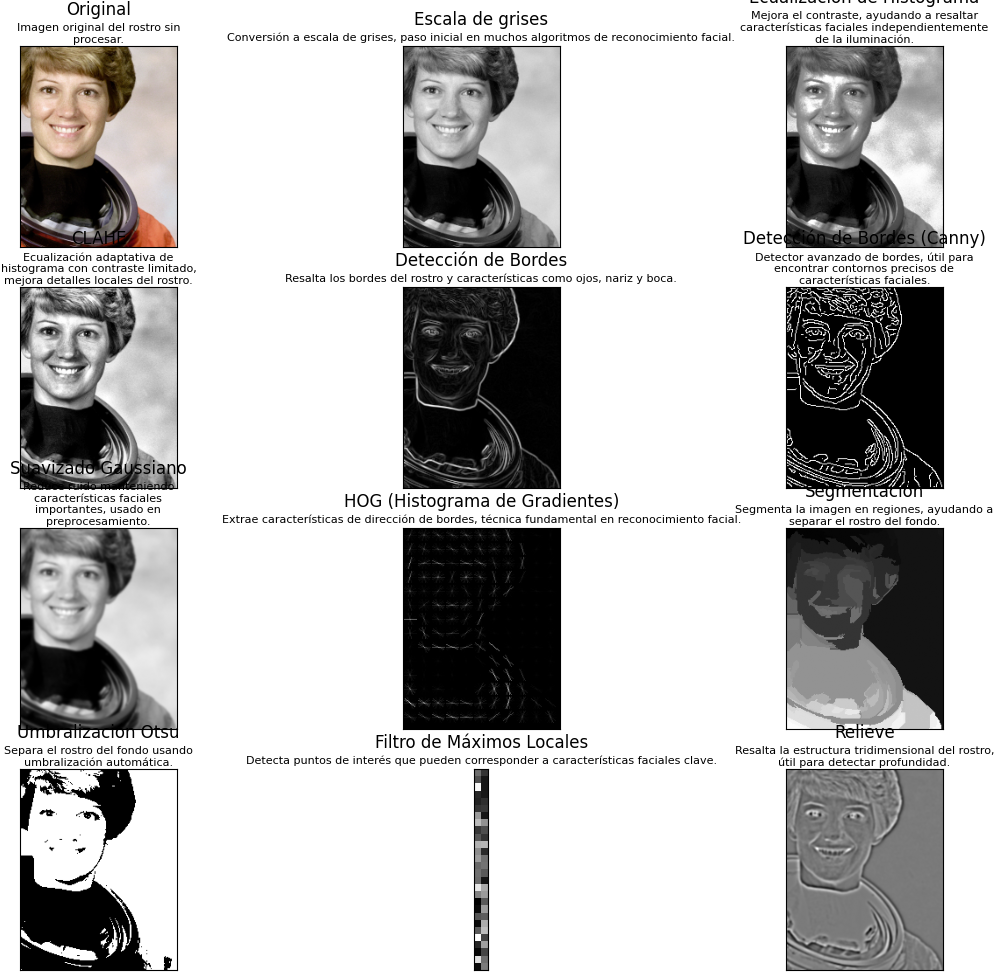

In [66]:
# Configurar la visualización
fig = plt.figure(figsize=(14, 12))
filas = 4
columnas = 3

# Aplicar y mostrar cada filtro
for i, (nombre, info) in enumerate(filtros.items()):
    # Crear subgráfico
    ax = plt.subplot(filas, columnas, i+1)

    # Aplicar filtro
    img_filtrada = info['funcion'](imagen)

    # Mostrar imagen
    if len(img_filtrada.shape) == 3:
        ax.imshow(img_filtrada)
    else:
        ax.imshow(img_filtrada, cmap='gray')

    # Añadir título y explicación
    ax.set_title(nombre)
    ax.set_xlabel(info['explicacion'], fontsize=8, wrap=True)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.set_yticks([])

In [67]:
# Añadir título general
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Técnicas de Procesamiento para Reconocimiento Facial", fontsize=16, y=0.98)
plt.show()

# Información adicional
print("\nImportancia del procesamiento de imágenes en reconocimiento facial:")
print("1. Preprocesamiento: Normalización, eliminación de ruido y mejora de contraste")
print("2. Extracción de características: Detección de puntos faciales clave como ojos, nariz y boca")
print("3. Reconocimiento: Comparación de patrones con bases de datos de rostros conocidos")
print("4. Verificación: Confirmación de identidad basada en similitud de características")

<Figure size 640x480 with 0 Axes>


Importancia del procesamiento de imágenes en reconocimiento facial:
1. Preprocesamiento: Normalización, eliminación de ruido y mejora de contraste
2. Extracción de características: Detección de puntos faciales clave como ojos, nariz y boca
3. Reconocimiento: Comparación de patrones con bases de datos de rostros conocidos
4. Verificación: Confirmación de identidad basada en similitud de características
